['CD_SDD_NKD,wrn_40_2_sdd,vgg8_sdd', 'CD_SDD_NKD,res32x4_sdd,mv2_sdd']



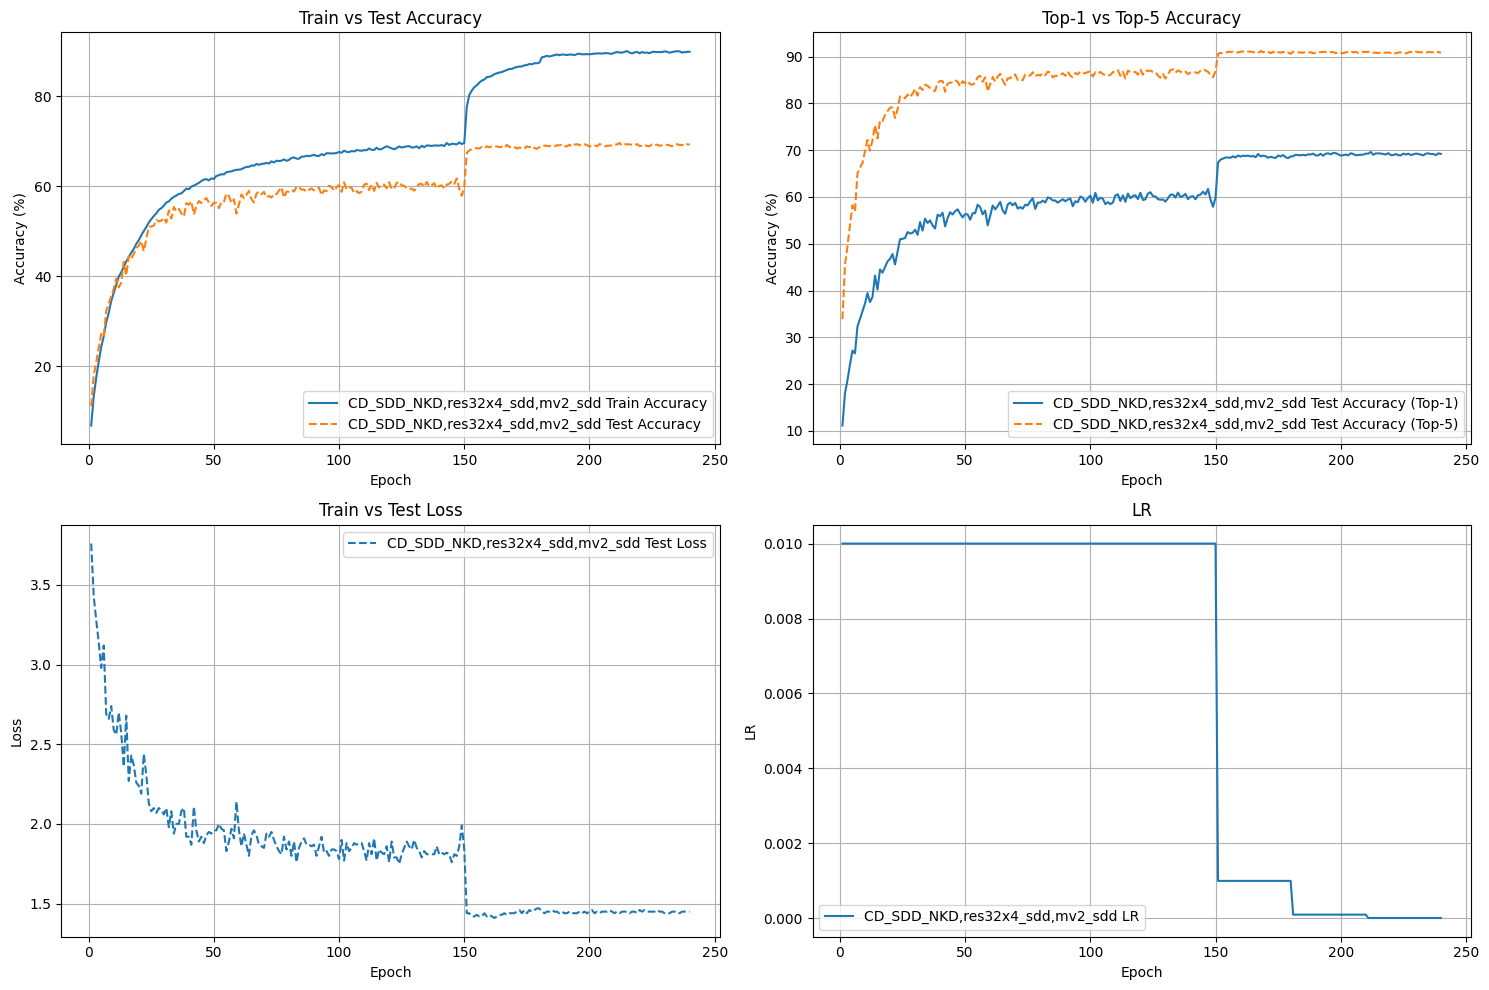

In [10]:
import os
import re
import matplotlib.pyplot as plt

# 定义函数从日志文件中提取数据
def parse_log_file(file_path):
    epochs = []
    train_accs = []
    train_losses = []
    test_accs = []
    test_accs_top5 = []
    test_losses = []
    lrs = []

    with open(file_path, 'r') as f:
        lines = f.readlines()
        for i in range(len(lines)):
            if "epoch:" in lines[i]:
                epoch = int(re.search(r'\d+', lines[i]).group())
                lr = float(re.search(r'lr: (\d+\.\d+)', lines[i + 1]).group(1))
                train_acc = float(re.search(r'train_acc: (\d+\.\d+)', lines[i + 2]).group(1))
                train_loss = float(re.search(r'train_loss: (\d+\.\d+)', lines[i + 3]).group(1))
                test_acc = float(re.search(r'test_acc: (\d+\.\d+)', lines[i + 4]).group(1))
                test_acc_top5 = float(re.search(r'test_acc_top5: (\d+\.\d+)', lines[i + 5]).group(1))
                test_loss = float(re.search(r'test_loss: (\d+\.\d+)', lines[i + 6]).group(1))

                epochs.append(epoch)
                train_accs.append(train_acc)
                train_losses.append(train_loss)
                test_accs.append(test_acc)
                test_accs_top5.append(test_acc_top5)
                test_losses.append(test_loss)
                lrs.append(lr)

    return epochs, train_accs, train_losses, test_accs, test_accs_top5, test_losses, lrs


# 获取所有文件夹路径
root_dir = '../output/cifar100_baselines'  # 设置为你的根目录，包含所有子文件夹
# root_dir = '../output/cub200_baselines_gamma1'  
root_dir = '../output/cifar100_baselines_gamma2' 
methods = [name for name in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, name))]
print(methods)
# methods = ['sdd_dkd,wrn_40_2_sdd,mv2_sdd', 'cd_sdd_dkd,wrn_40_2_sdd,mv2_sdd']
# methods = ['sdd_dkd,wrn_40_2_sdd,vgg8_sdd', 'cd_sdd_dkd,wrn_40_2_sdd,vgg8_sdd']
# methods = ['sdd_dkd,res32x4_sdd,mv2_sdd', 'cd_sdd_dkd,res32x4_sdd,mv2_sdd']
root_dirs = ['../output/cifar100_baselines_gamma2']
methods = ["CD_SDD_NKD,res32x4_sdd,mv2_sdd"]
# 存储每个方法的数据
data_dict = {}

for root in root_dirs:
    for method in methods:
        log_file_path = os.path.join(root, method, 'worklog.txt')
        if os.path.exists(log_file_path):
            data_dict[method] = parse_log_file(log_file_path)
print()
plt.figure(figsize=(15, 10))

# -------------------------------------------
# 准确率曲线：Train vs Test (每个方法的 Train Accuracy 和 Test Accuracy)
# -------------------------------------------
plt.subplot(2, 2, 1)
for method, (epochs, train_accs, _, test_accs, _, _, _) in data_dict.items():
    plt.plot(epochs, train_accs, label=f'{method} Train Accuracy')
    plt.plot(epochs, test_accs, label=f'{method} Test Accuracy', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Train vs Test Accuracy')
plt.legend()
plt.grid(True)

# -------------------------------------------
# Top-1 vs Top-5 准确率曲线（每个方法的 Test Accuracy Top-1 和 Top-5）
# -------------------------------------------
plt.subplot(2, 2, 2)
for method, (epochs, _, _, test_accs, test_accs_top5, _, _) in data_dict.items():
    plt.plot(epochs, test_accs, label=f'{method} Test Accuracy (Top-1)')
    plt.plot(epochs, test_accs_top5, label=f'{method} Test Accuracy (Top-5)', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Top-1 vs Top-5 Accuracy')
plt.legend()
plt.grid(True)

# -------------------------------------------
# 损失曲线：Train vs Test
# -------------------------------------------
plt.subplot(2, 2, 3)
for method, (epochs, _, train_losses, _, _, test_losses, _) in data_dict.items():
    # plt.plot(epochs, train_losses, label=f'{method} Train Loss')
    plt.plot(epochs, test_losses, label=f'{method} Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Test Loss')
plt.legend()
plt.grid(True)

# -------------------------------------------
# 可选：添加一个第四张图，比如你还可以画学习率变化、其他指标等
# 这里我们留空或画一个其他你想展示的内容
# -------------------------------------------
plt.subplot(2, 2, 4)
# 示例：绘制 Top-5 Test Accuracy
for method, (epochs, _, _, _, _, _, lr) in data_dict.items():
    plt.plot(epochs, lr, label=f'{method} LR')
plt.xlabel('Epoch')
plt.ylabel('LR')
plt.title('LR')
plt.legend()
plt.grid(True)

# -------------------------------------------
# 显示图表
# -------------------------------------------
plt.tight_layout()
plt.show()